In [1]:
"""
data set used:
Petrol/Gas prices worldwide.
It contains world share of petrol consumption by country, price per gallon, price per litter and the 
corresponding price in Pakistan Rupee (Conversion Rate 1 USD = 211.5 PKR)
"""

'\ndata set used:\nPetrol/Gas prices worldwide.\nIt contains world share of petrol consumption by country, price per gallon, price per litter and the \ncorresponding price in Pakistan Rupee (Conversion Rate 1 USD = 211.5 PKR)\n'

In [7]:
#importing librairies 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import io
import sklearn as sk #import tree 
from sklearn.model_selection import train_test_split
import sklearn.tree as skt#import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering 
from csv import reader
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [8]:
#extracting data
dataset = []
with open('./Petrol Dataset June 23 2022 -- Version 2.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        # row variable is a list that represents a row in csv
        dataset.append(row)


In [9]:
#creating a dataframe
data = {}
c = 0
ls = []
aux = 0.0

for items in dataset:
    c = c + 1
    col = -1
    for item in items:
        col = col + 1
        if c == 1:
            data[item] = []
            ls.append(item)
        else:
            if col in [2,8,9] :
                s = ''
                for i in item:
                    if i <= '9' and i >= '0':
                        s = s + i
                item = int(s)
            if col in [5,6,7] :
                item = float(item)
                
            data[ls[col]].append(item) 
df = pd.DataFrame(data)
"""
df = df.replace(',', '.') 
for i in df['Daily Oil Consumption (Barrels)']:
    df['Daily Oil Consumption (Barrels)'][] = i.replace(',', '.') 
"""
df

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,19687287,20%,934.3,5.19,1.37,289.97,63414,12218,13
1,2,China,12791553,13%,138.7,5.42,1.43,302.87,10435,1925,14
2,3,India,4443000,5%,51.4,5.05,1.33,281.93,1901,376,7
3,4,Japan,4012877,4%,481.5,4.69,1.24,262.05,40193,8570,18
4,5,Russia,3631287,4%,383.2,3.41,0.90,190.56,10127,2970,8
...,...,...,...,...,...,...,...,...,...,...,...
176,177,Belize,4001,0%,166.5,6.68,1.76,373.09,4436,664,4
177,178,Niue,51,0%,484.4,11.43,3.02,638.73,15586,1364,3
178,179,Saint Pierre & Miquelon,660,0%,1705.1,8.27,2.19,462.13,34900,4220,2
179,180,Montserrat,400,0%,1231.1,4.57,1.21,255.07,12589,2755,2


                                 Daily Oil Consumption (Barrels)  \
Daily Oil Consumption (Barrels)                         1.000000   
Price Per Gallon (USD)                                 -0.029965   
Price Per Liter (USD)                                  -0.030106   
Price Per Liter (PKR)                                  -0.029938   
GDP Per Capita ( USD )                                  0.190066   
Gallons GDP Per Capita Can Buy                          0.051464   

                                 Price Per Gallon (USD)  \
Daily Oil Consumption (Barrels)               -0.029965   
Price Per Gallon (USD)                         1.000000   
Price Per Liter (USD)                          0.999997   
Price Per Liter (PKR)                          1.000000   
GDP Per Capita ( USD )                         0.182356   
Gallons GDP Per Capita Can Buy                -0.127351   

                                 Price Per Liter (USD)  Price Per Liter (PKR)  \
Daily Oil Consumption (Barre

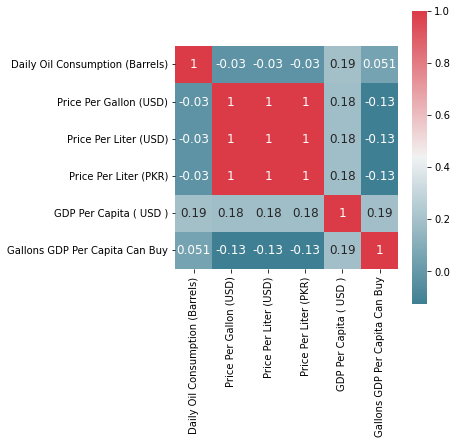

In [10]:
#visualization
"""
v = sns.FacetGrid(df,row='Yearly Gallons Per Capita')
v.map(sns.histplot,'Price Per Gallon (USD)',bins=5)
#sns.histplot(df['Daily Oil Consumption (Barrels)'],x=df['World Share'],bins=5,kde=True)
p = sns.FacetGrid(df,col="xTimes Yearly Gallons Per Capita Buy")
p.map(sns.histplot,"Price Per Liter (PKR)",bins=5)
"""

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 5 , 6 ) )

    cmap = sns.diverging_palette( 220 , 10, as_cmap = True )
    print(corr)

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 


        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
  
plot_correlation_map( df ) 

Mean squared error:  339547967.1131903
R squared:  0.01782844154789287


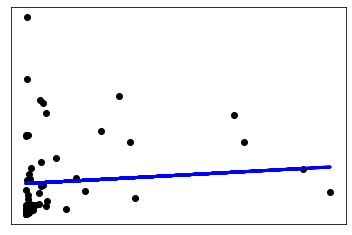

Mean squared error:  339547967.1131903
R squared:  0.01782844154789287


In [18]:
#7
#polynomial regression
x= df["Daily Oil Consumption (Barrels)"].values.reshape(-1,1)
y= df["GDP Per Capita ( USD )"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#linear regression
model = LinearRegression()
model.fit(x_train,y_train)
predicted = model.predict(x_test)

print("Mean squared error: ",mean_squared_error(y_test,predicted))
print("R squared: ",metrics.r2_score(y_test,predicted))
#plotting linear regression

plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, predicted, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


#performence of LR
MSE_LR = mean_squared_error(y_test,predicted)
RS_LR = metrics.r2_score(y_test,predicted)
print("Mean squared error: ",MSE_LR)
print("R squared: ",RS_LR)

R squared:  -0.012237459823658536  MS error 746747172570.6494


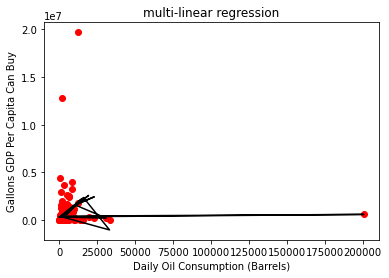

In [23]:

#polynomial regression
x= df['Gallons GDP Per Capita Can Buy'].values.reshape(-1,1)
y= df['Daily Oil Consumption (Barrels)'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.12, random_state=0)
poly = PolynomialFeatures(degree = 4) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 

model = LinearRegression()
model.fit(x_train,y_train)
predicted = model.predict(x_test)


MSE_PR = mean_squared_error(y_test,predicted)
RS_PR = metrics.r2_score(y_test,predicted)

print("R squared: ",RS_PR, " MS error", MSE_PR)

lg=LinearRegression()
lg.fit(x_poly, y) 
plt.scatter(x, y, color="r")
plt.title("multi-linear regression")
plt.ylabel("Gallons GDP Per Capita Can Buy")
plt.xlabel("Daily Oil Consumption (Barrels)")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

In [24]:
"""
so we gonna work with the polynomial regression method because its more accurate than linear regression (when we remove the
outliers)
"""

'\nso we gonna work with the polynomial regression method because its more accurate than linear regression (when we remove the\noutliers)\n'

In [25]:
#Removing Outliers
#Finding the Boundary Values
print("Highest allowed",df['Daily Oil Consumption (Barrels)'].mean() + 3*df['Daily Oil Consumption (Barrels)'].std())
print("Lowest allowed",df['Daily Oil Consumption (Barrels)'].mean() - 3*df['Daily Oil Consumption (Barrels)'].std())

Highest allowed 6107774.356504348
Lowest allowed -5040628.257056835


In [26]:
# Finding the Outliers
df[(df['Daily Oil Consumption (Barrels)'] > 6107774.356504348) | (df['Daily Oil Consumption (Barrels)'] < -5040628.257056835)]
#Trimming of Outliers
new_df = df[(df['Daily Oil Consumption (Barrels)'] < 6107774.356504348) & (df['Daily Oil Consumption (Barrels)'] > -5040628.257056835)]
new_df

#Capping on Outliers

upper_limit = df['Daily Oil Consumption (Barrels)'].mean() + 3*df['Daily Oil Consumption (Barrels)'].std()
lower_limit = df['Daily Oil Consumption (Barrels)'].mean() - 3*df['Daily Oil Consumption (Barrels)'].std()

#Now, apply the Capping
df['Daily Oil Consumption (Barrels)'] = np.where(
    df['Daily Oil Consumption (Barrels)']>upper_limit,
    upper_limit,
    np.where(
        df['Daily Oil Consumption (Barrels)']<lower_limit,
        lower_limit,
        df['Daily Oil Consumption (Barrels)']
    )
)

df['Daily Oil Consumption (Barrels)'].describe()

count    1.810000e+02
mean     4.216212e+05
std      9.550640e+05
min      5.100000e+01
25%      2.003600e+04
50%      6.161200e+04
75%      2.623520e+05
max      6.107774e+06
Name: Daily Oil Consumption (Barrels), dtype: float64

In [27]:
#Finding the Boundary Values
print("Highest allowed",df['Gallons GDP Per Capita Can Buy'].mean() + 3*df['Gallons GDP Per Capita Can Buy'].std())
print("Lowest allowed",df['Gallons GDP Per Capita Can Buy'].mean() - 3*df['Gallons GDP Per Capita Can Buy'].std())


Highest allowed 50488.42977858812
Lowest allowed -42129.7446957152


In [28]:

# Finding the Outliers
df[(df['Gallons GDP Per Capita Can Buy'] > 50488.42977858812) | (df['Gallons GDP Per Capita Can Buy'] < -42129.7446957152)]
#Trimming of Outliers
new_df = df[(df['Gallons GDP Per Capita Can Buy'] < 50488.42977858812) & (df['Gallons GDP Per Capita Can Buy'] > -42129.7446957152)]
new_df

#Capping on Outliers

upper_limit = df['Gallons GDP Per Capita Can Buy'].mean() + 3*df['Gallons GDP Per Capita Can Buy'].std()
lower_limit = df['Gallons GDP Per Capita Can Buy'].mean() - 3*df['Gallons GDP Per Capita Can Buy'].std()

#Now, apply the Capping
df['Gallons GDP Per Capita Can Buy'] = np.where(
    df['Gallons GDP Per Capita Can Buy']>upper_limit,
    upper_limit,
    np.where(
        df['Gallons GDP Per Capita Can Buy']<lower_limit,
        lower_limit,
        df['Gallons GDP Per Capita Can Buy']
    )
)

df['Gallons GDP Per Capita Can Buy'].describe()

count      181.000000
mean      3349.444363
std       5911.445424
min         24.000000
25%        473.000000
50%       1410.000000
75%       4103.000000
max      50488.429779
Name: Gallons GDP Per Capita Can Buy, dtype: float64

Mean squared error:  334740148.42484033
R squared:  0.03173546862874632


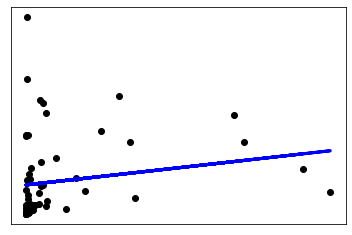

Mean squared error:  334740148.42484033
R squared:  0.03173546862874632


In [29]:
#7
#polynomial regression
x= df["Daily Oil Consumption (Barrels)"].values.reshape(-1,1)
y= df["GDP Per Capita ( USD )"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#linear regression
model = LinearRegression()
model.fit(x_train,y_train)
predicted = model.predict(x_test)

print("Mean squared error: ",mean_squared_error(y_test,predicted))
print("R squared: ",metrics.r2_score(y_test,predicted))
#plotting linear regression

plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, predicted, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


#performence of LR
MSE_LR = mean_squared_error(y_test,predicted)
RS_LR = metrics.r2_score(y_test,predicted)
print("Mean squared error: ",MSE_LR)
print("R squared: ",RS_LR)

R squared:  0.041802756736062374  MS error 706880658513.654


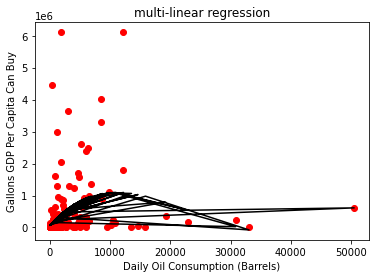

In [31]:

#polynomial regression
x= df['Gallons GDP Per Capita Can Buy'].values.reshape(-1,1)
y= df['Daily Oil Consumption (Barrels)'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.12, random_state=0)
poly = PolynomialFeatures(degree = 4) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 

model = LinearRegression()
model.fit(x_train,y_train)
predicted = model.predict(x_test)


MSE_PR = mean_squared_error(y_test,predicted)
RS_PR = metrics.r2_score(y_test,predicted)

print("R squared: ",RS_PR, " MS error", MSE_PR)

lg=LinearRegression()
lg.fit(x_poly, y) 
plt.scatter(x, y, color="r")
plt.title("multi-linear regression")
plt.ylabel("Gallons GDP Per Capita Can Buy")
plt.xlabel("Daily Oil Consumption (Barrels)")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 


In [ ]:
"""
we can see that after removing the outliers the poàlynomial regression become more accurate than the linear regression
"""